In [1]:
#!pip install parse

In [2]:
import glob
import os
import parse

In [3]:
log_folder = "/media/data/dad/cnet/experiments/coco10novel/image_log/train/"
log_names = [os.path.basename(path) for path in glob.glob(os.path.join(log_folder, "*"))]
print(len(log_names))

800


In [4]:
log_format = "{}_gs-{:06}_e-{:06}_b-{:06}.png"
logs = []
for log_name in log_names:
    logs.append(list(parse.parse(log_format, log_name)) + [log_name])

In [5]:
log_types = list({log[0] for log in logs})
log_types = ['control', 'reconstruction', 'samples_cfg_scale_9.00']

In [6]:
log_iters = sorted(list({log[1] for log in logs}))
#log_iters

['000000',
 '000025',
 '000030',
 '000055',
 '000060',
 '000085',
 '000090',
 '000115',
 '000120',
 '000145',
 '000150',
 '000175',
 '000180',
 '000205',
 '000210',
 '000235',
 '000240',
 '000265',
 '000270',
 '000295',
 '000300',
 '000325',
 '000330',
 '000355',
 '000360',
 '000385',
 '000390',
 '000415',
 '000420',
 '000445',
 '000450',
 '000475',
 '000480',
 '000505',
 '000510',
 '000535',
 '000540',
 '000565',
 '000570',
 '000595',
 '000600',
 '000625',
 '000630',
 '000655',
 '000660',
 '000685',
 '000690',
 '000715',
 '000720',
 '000745',
 '000750',
 '000775',
 '000780',
 '000805',
 '000810',
 '000835',
 '000840',
 '000865',
 '000870',
 '000895',
 '000900',
 '000925',
 '000930',
 '000955',
 '000960',
 '000985',
 '000990',
 '001015',
 '001020',
 '001045',
 '001050',
 '001075',
 '001080',
 '001105',
 '001110',
 '001135',
 '001140',
 '001165',
 '001170',
 '001195',
 '001200',
 '001225',
 '001230',
 '001255',
 '001260',
 '001285',
 '001290',
 '001315',
 '001320',
 '001345',
 '001350',

In [7]:
log_epochs = sorted(list({log[2] for log in logs}))
#log_epochs

['000000',
 '000001',
 '000002',
 '000003',
 '000004',
 '000005',
 '000006',
 '000007',
 '000008',
 '000009',
 '000010',
 '000011',
 '000012',
 '000013',
 '000014',
 '000015',
 '000016',
 '000017',
 '000018',
 '000019',
 '000020',
 '000021',
 '000022',
 '000023',
 '000024',
 '000025',
 '000026',
 '000027',
 '000028',
 '000029',
 '000030',
 '000031',
 '000032',
 '000033',
 '000034',
 '000035',
 '000036',
 '000037',
 '000038',
 '000039',
 '000040',
 '000041',
 '000042',
 '000043',
 '000044',
 '000045',
 '000046',
 '000047',
 '000048',
 '000049',
 '000050',
 '000051',
 '000052',
 '000053',
 '000054',
 '000055',
 '000056',
 '000057',
 '000058',
 '000059',
 '000060',
 '000061',
 '000062',
 '000063',
 '000064',
 '000065',
 '000066',
 '000067',
 '000068',
 '000069',
 '000070',
 '000071',
 '000072',
 '000073',
 '000074',
 '000075',
 '000076',
 '000077',
 '000078',
 '000079',
 '000080',
 '000081',
 '000082',
 '000083',
 '000084',
 '000085',
 '000086',
 '000087',
 '000088',
 '000089',
 '000090',

In [8]:
log_batchs = sorted(list({log[3] for log in logs}))
log_batchs

['000000', '000100']

In [9]:
log_dict = {tuple(log[:2]):log[-1] for log in logs}  # key: (log_type, log_iter)

In [10]:
#iters_to_display = log_iters[:2]
iters_to_display = log_iters[::8]
print(iters_to_display)
types_to_display = log_types
image_names_to_display = [log_dict[(log_type, log_iter)] for log_iter in iters_to_display for log_type in types_to_display]
image_files_to_display = [os.path.join(log_folder, name) for name in image_names_to_display]

['000000', '000120', '000240', '000360', '000480', '000600', '000720', '000840', '000960', '001080', '001200', '001320', '001440', '001560', '001680', '001800', '001920', '002040', '002160', '002280', '002400', '002520', '002640', '002760', '002880']


In [11]:
import matplotlib.pyplot as plt
import numpy as np
def plot_figures(images, nrows = 1, ncols=4):

    fig = plt.figure()
    
    image_heigt = 256 # Height of the image
    image_width = 256 # Width of the image

    pixels = np.zeros((nrows*image_heigt,ncols*image_width, 3), dtype=np.uint8) # Create
    curr = 0
    for a in range(nrows):
        for b in range(ncols):
            resized = cv2.resize(images[curr], (image_width, image_heigt)).astype(np.uint8)
            pixels[a*image_heigt:a*image_heigt+image_heigt,b*image_heigt:b*image_heigt+image_heigt] = resized
            curr += 1
    plt.imshow(pixels[:,:,::-1], cmap='gray')
    plt.axis('off')
    plt.show()
    cv2.imwrite("visualize_imglog.png", pixels)

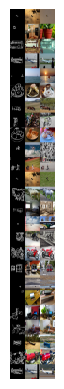

In [12]:
import cv2

images = [cv2.imread(f) for i, f in enumerate(image_files_to_display)]

# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(images, len(iters_to_display), len(log_types))